# Titanic Initial EDA

In [2]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv("../data/titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


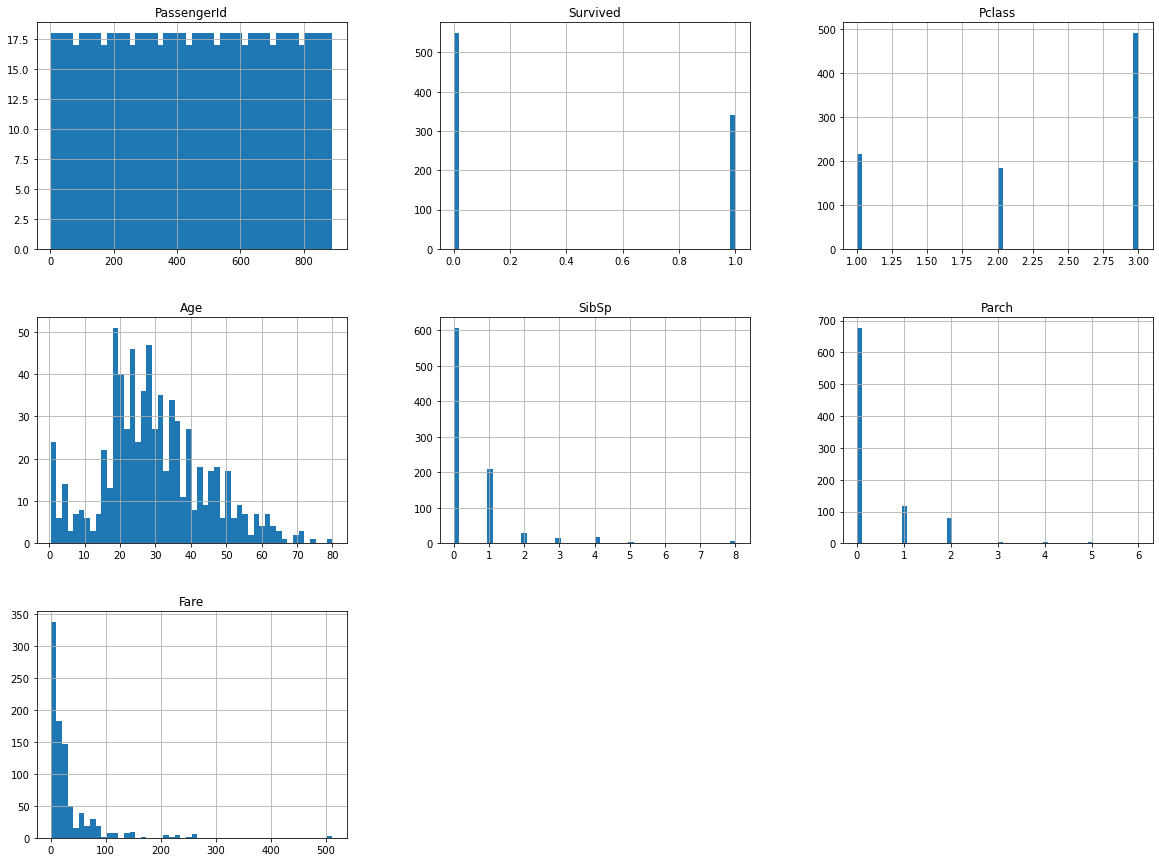

In [7]:
p = df.hist(bins=50, figsize=(20,15))

In [8]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Notes:

* Pclass is negatively correlated with survival status.
* Fare is positively correlated with survival status.

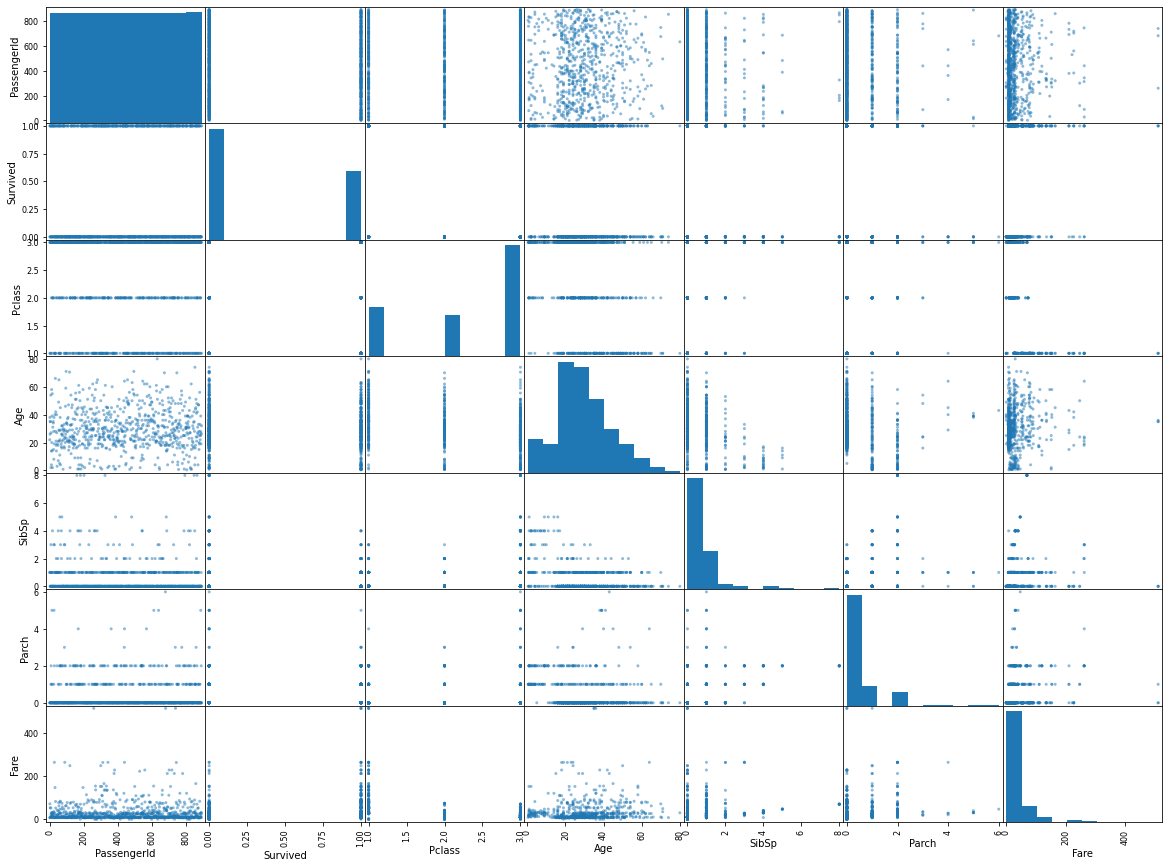

In [13]:
p = scatter_matrix(df, figsize=(20,15))

The scatter plots above are not so useful, because survival is a categorical variable.  Therefore, hard to observe any real correlations here.

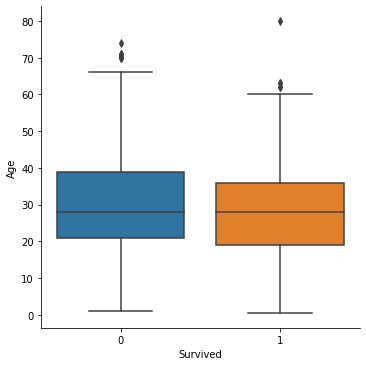

In [14]:
p = sns.catplot(x="Survived", y="Age", kind="box", data=df)

Not big trends observed here.  Age does not appear to be correlated with survival.

In [15]:
df["Child"] = df["Age"] < 18
df["Child"].value_counts()

False    778
True     113
Name: Child, dtype: int64

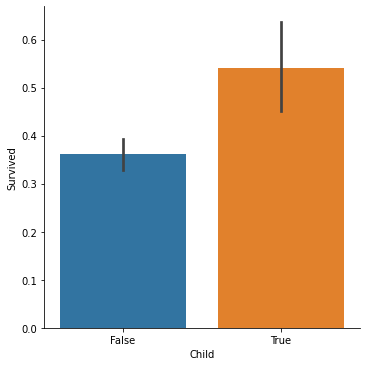

In [16]:
p = sns.catplot(y="Survived", x="Child", kind="bar", data=df)

But, there is an actual correlation when you break down into children v. adults.  In this case, 55% of children survived v. 35% of adults.

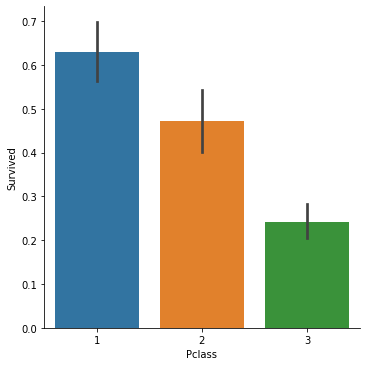

In [17]:
p = sns.catplot(y="Survived", x="Pclass", kind="bar", data=df)

Definite correlation between class and survival.  ~60% of first class passengers survived v. ~25% of third class passengers.

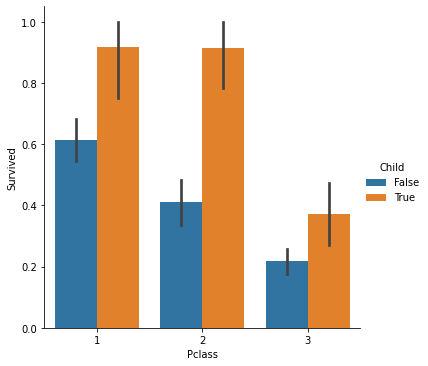

In [18]:
p = sns.catplot(y="Survived", x="Pclass", hue="Child", kind="bar", data=df)

Children fared better in all classes.  In fact, children in first class has a 90% survival rate!

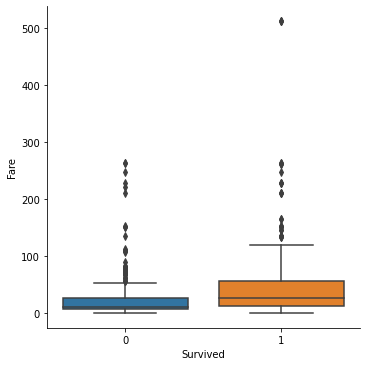

In [19]:
p = sns.catplot(x="Survived", y="Fare", kind="box", data=df)

The more you paid in fare, the higher you chances of survival.

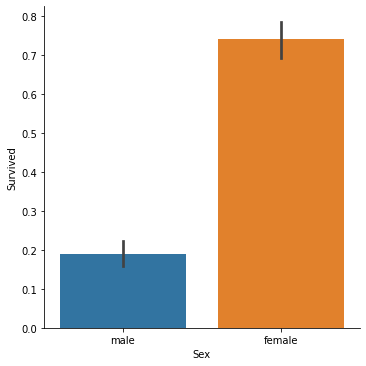

In [20]:
p = sns.catplot(y="Survived", x="Sex", kind="bar", data=df)

Sex is a major predictor.

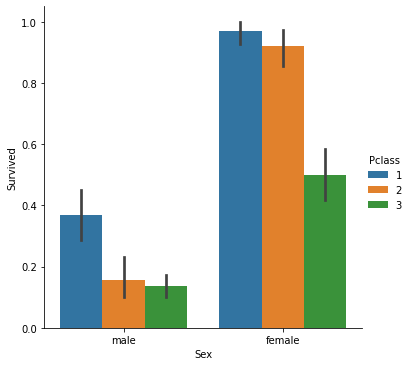

In [21]:
p = sns.catplot(y="Survived", x="Sex", hue="Pclass", kind="bar", data=df)

Females in first class had ~95% survival.  Females in second class had ~90% survival.

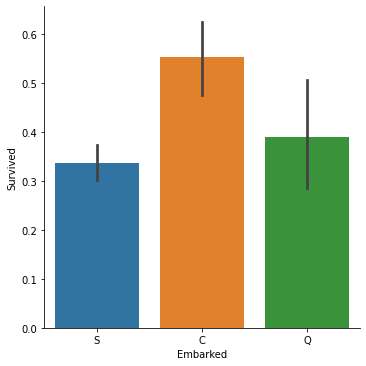

In [22]:
p = sns.catplot(y="Survived", x="Embarked", kind="bar", data=df)

Emarking station is also a predictor, but this could be correlated or tied with other variables.

In [23]:
df["Level"] = df["Cabin"].str[0]

The actual cabin # might not be informative, but the level could be. Or better yet, we could split level and room # and see if either is predictive.

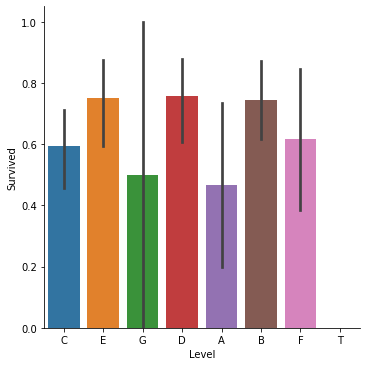

In [24]:
p = sns.catplot(y="Survived", x="Level", kind="bar", data=df)

Level is definitely a predictor.

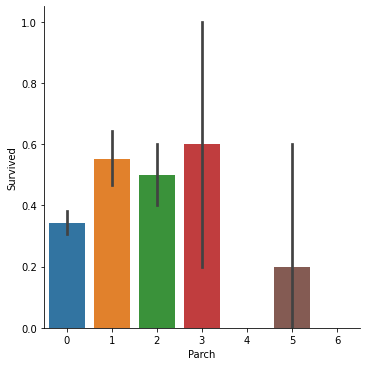

In [25]:
p = sns.catplot(y="Survived", x="Parch", kind="bar", data=df)

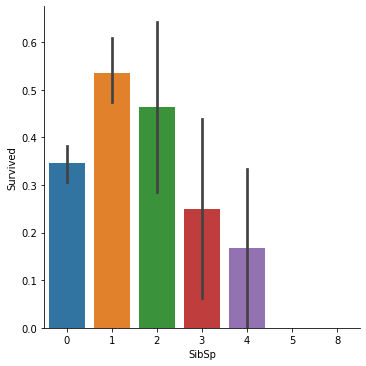

In [26]:
p = sns.catplot(y="Survived", x="SibSp", kind="bar", data=df)

Also a predictor.

For my initial predictor, I think I will go with a small set of features and drop the following:
* PassengerId
* Name
* Ticket
* Cabin

The following will also need to be one-hot encoded:

* Sex
* Embarked

After the first round, I am going to:
* Replace Age with Child
* Replace Cabin with Level

In [27]:
df.sort_values(by="Fare", ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Level
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,False,NaN
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,False,B
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,False,B
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,False,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,False,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,False,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,False,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,False,B
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,False,B
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,False,B


In the above, I was just curious to see who payed the most on the Titanic.

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Child            0
Level          687
dtype: int64

Age and Cabin both have missing values.